## 1.1 A Journey of a Thousand Miles

__Genome Replications__ is one of the most important taksts carried out in the cell. Before a cell can divide, it must first replicate its genome so that each of the two daughter cells inherits its own copy. In 1953, James Watson and Francis Crick completed their landmark paper on the DNA double helix with a now-famous phrase:

_It has not escaped our notice that the specific pairing we have postulated immediately suggests a possible copying mechanism for the genetic material._

They conjectured that the two strands of the parent DNA molecule unwind during replication, and then each parent strand acts as a template for the synthesis of a new strand. As a result, the replication process begins with a pair of complementary strands of DNA and ends with two pairs of complementary strands, as shown in the figure below.

Although this figure successfully models DNA replication on a simple level, the details of replication turned out to be much more intricate than Watson and Crick imagined; as we will see, an astounding amount of molecular logistics is required to ensure DNA replication.

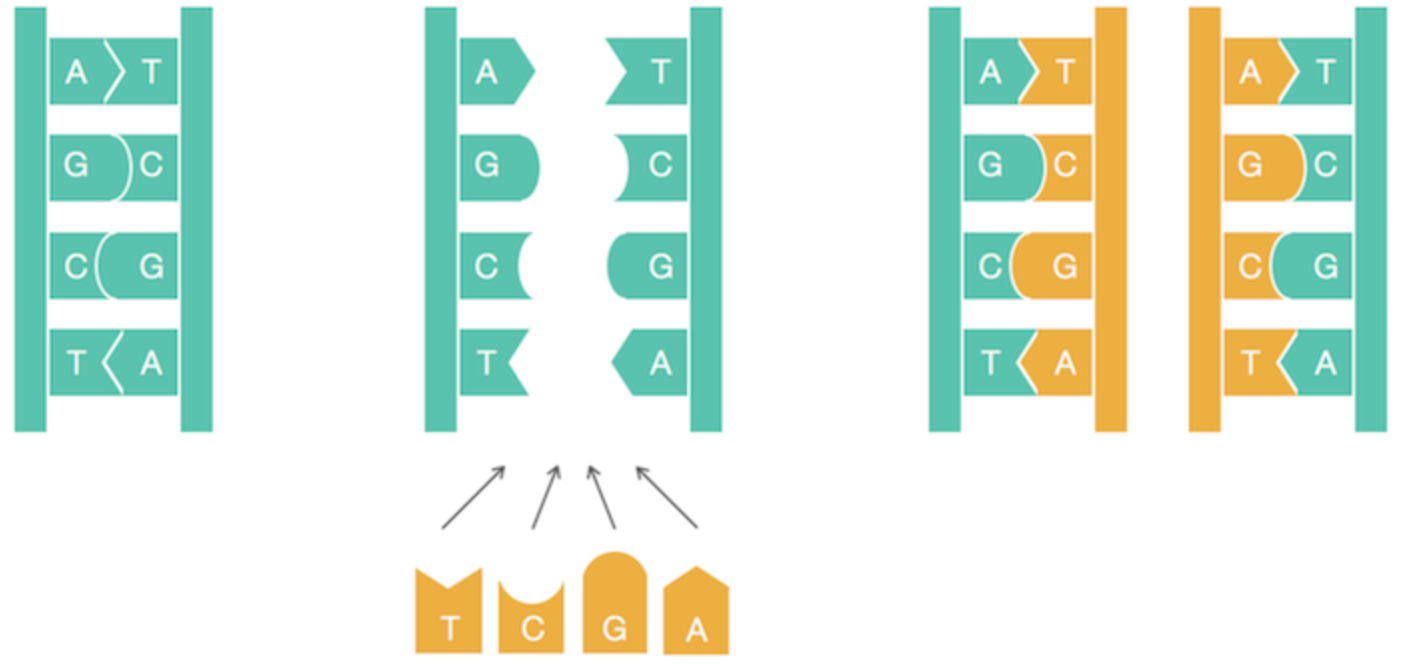

__Figure:__ A naive view of replication. Nucleotides adenine (A) and thymine (T) are complements of each other, as are cytosine (C) and guanine (G). Complementary nucleotides bind to each other in DNA.

Replication begins in a genomic region called the __replication origin__ (denoted _ori_) and is carried out by molecular copy machines called __DNA polymeraes__. 

Locating _ori_ presents an important task not only for understanding how cells replicate but also for various biomedical problems. For exampel, some __gene therapy__ methods use genetically engineered mini-genomes, which are called __viral vectors__ because they are able to penetrate cell walls.

The idea of gene therapy is to intentionally infect a patient who lacks a crucial gene with a viral vector containing an artificial gene that encodes a therapeutic protein. Once insde the cell, the ector replicates and eventually produces many copies of the therapeutic protein, which in turn treates the patient's disease. To ensure that the vector actually replicates inside the cell, biologists must know where _ori_ is in the cevtor's genome and ensure that the genetic manipulations that they perform do not affect it. 

In the In the following problem, we assume that a genome has a single ori and is represented as a __DNA string__, or a string of nucleotides from the four-letter alphabet {A, C, G, T}.

__Finding Origin of Replication Problem:__

__Input:__ A DNA string Genome.

__Output:__ The location of _ori_ in Genome.

## 1.2 Hidden Messages in the Replication Origin

### __Finding _ori_ in bacterial genomes__

- baccterial genomes onsist of a single circular chromosome -> easy to find _ori_
- the plan is to begin with a bacterium in which _ori_ is known, and then determine what makes this genomic region special in order to design a computational approach for finding _ori_ in other bacteria
- example used: _Vibrio cholerae_, the pathogenic bacterium that causes cholera. - 1,108,250 nucleotides

The initiation of replication is mediated by __DnaA__, a protein that binds to a short segment within the _ori_ known as a __DnaA box__.

__DnaA box__ = message within the DNA sequence that tells the DnaA protein the location to BIND

### Counting Words

Certain nucleotide strings often appear surprisingly often in small regions of the genome. 
- because certain proteins can only bind to DNA if a specific string of nucleotides is present
- more occurences of the string </br> 
    > = higher success rate of binding occurance </br>
    = less likely that a mutatino will disrupt the binding process.

For example, __ACTAT__ is a surprisingly frequent substring of ACA**ACTAT**GCAT**ACTAT**CGGGA**ACTAT**CCT.

We will use the term __k-mer__ to refer to a string of length k and define _Count(Text, Pattern)_ as the number of times that a k-mer Pattern appears as a substring of Text. Following the above example, 

                            Count(ACAACTATGCATACTATCGGGAACTATCCT, ACTAT) = 3.

We note that Count(CG**ATATA**TCC**ATA**G, __ATA__) is equal to 3 (not 2) since we should account for overlapping occurrences of Pattern in Text.

### Code Challenge
    
    : Implement PatternCount (reproduced below in pseudocode)
    
**Input:** Strings _Text_ and _Pattern_ 
   
**Output:** _Count(Text, Pattern_)


<div>
    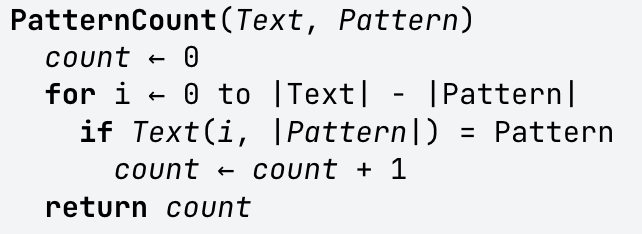
</div>

In [11]:
def PatternCount(text, pattern):
    n = 0
    l_text = len(text)
    l_pattern = len(pattern)

    for i in range(l_text-l_pattern + 1):
        # print(i)
        
        if text[i:i + l_pattern] == pattern:
            n += 1
            # print(text[i:i + l_pattern], n)
    
    return n


# text = input('Enter the Text:')
# pattern = input('Enter the Pattern:')

text = 'GACCATCAAAACTGATAAACTACTTAAAAATCAGT'
pattern = 'AAA'

count = PatternCount(text,pattern)
print(count)
        

6


<div>
    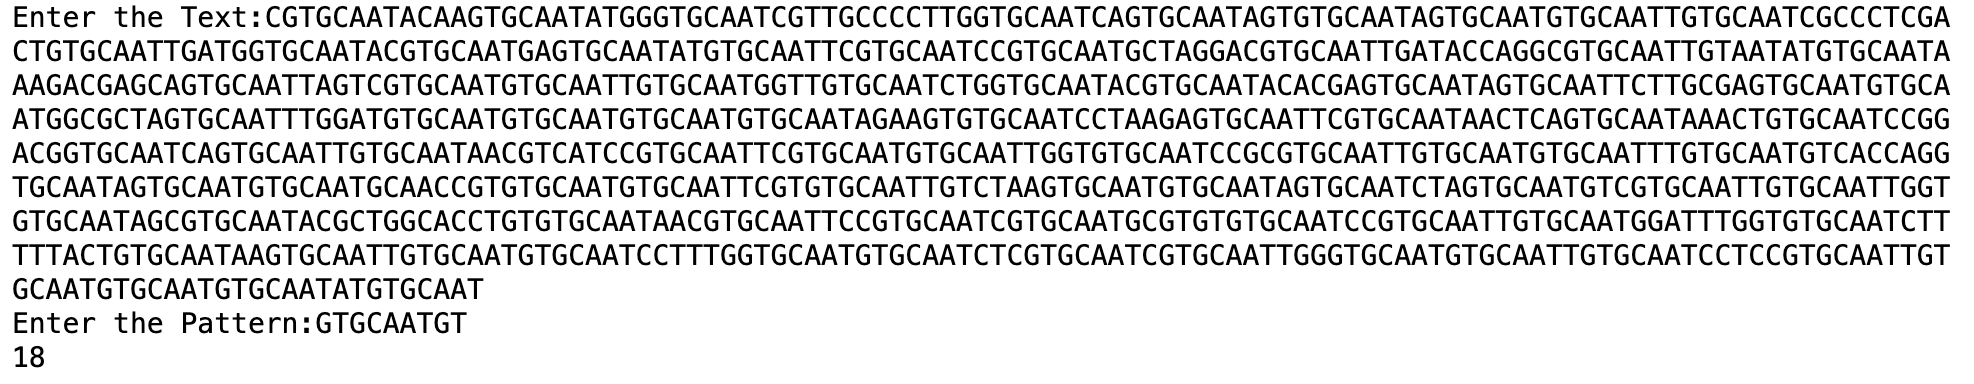
</div>


## The Frequent Words Problem 

We say that Pattern is a __most frequent k-mer__ in Text if it maximizes _Count(Text, Pattern)_ among all k-mers. You can see that **ACTAT** is a most frequent 5-mer of ACA**ACTAT**GCAT**ACTAT**CGGGA**ACTAT**CCT, and **ATA** is a most frequent 3-mer of CG**ATATA**TCC**ATA**G.

CAN A STRING HAVE MULTIPLE FREQUENT *k*-mers?

**Frequent Workds Problem:** _Find the most frequent k-mers in a string_

__Input:__ A string _Text_ and an integer _k_

__Output:__ All most frequent *k*-mers in _Text_

A straightforward algorithm for finding the most frequent *k*-mers in a string *Text* checks all *k*-mers appearing in this string (there are |*Text*| − *k* + 1 such *k*-mers) and then computes how many times each *k*-mer appears in *Text*. To implement this algorithm, called **FrequentWords**, we will need to generate an array *Count*, where *Count(i)* stores *Count(Text, Pattern)* for *Pattern = Text(i, k)* (see figure below).

<div>
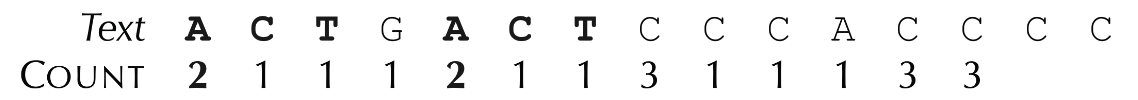
</div>


**Figure:** The array Count for *Text* = ACTGACTCCCACCCC and *k* = 3. For example, *Count(0) = Count(4) = 2* because ACT (shown in boldface) appears twice in *Text*.

The pseudocode for **FrequentWords** is shown below

<div>
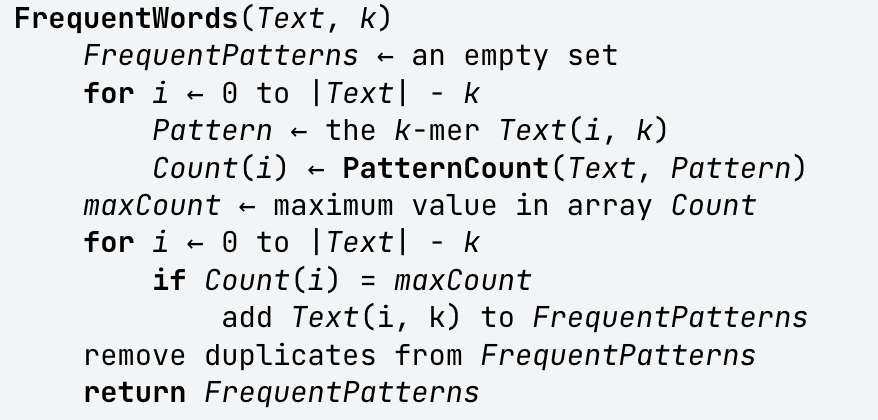
</div>

Although **FrequentWords** finds most frequent *k*-mers, it is not very efficient. Each call to **PatternCount**(*Text, Pattern*) checks whether the *k*-mer Pattern appears in position 0 of *Text*, position 1 of *Text*, and so on. Since each *k*-mer requires |*Text*| − k + 1 such checks, each one requiring as many as *k* comparisons, the overall number of steps of **PatternCount**(*Text, Pattern*) is (|*Text*| − k + 1) · k. Furthermore, **FrequentWords** must call **PatternCount** |Text| − k + 1 times (once for each *k*-mer of *Text*), so that its overall number of steps is (|*Text*| − k + 1) · (|Text| − k + 1) · k. To simplify the matter, computer scientists often say that the runtime of **FrequentWords** has an upper bound of |Text|2 · k steps and refer to the **complexity** of this algorithm as O(|Text|2 · k).


If |Text| and k are small, as is the case when looking for DnaA boxes in the typical bacterial ori, then an algorithm with running time of O(|Text|2 · k) is perfectly acceptable. But once we find some new biological application requiring us to solve the Frequent Words Problem for a very long Text, we will quickly run into trouble. 

### A Faster Frequent Words Aproach

**Frequency Table** for _Text_ and _k_

Slide a length-*k* window _Text_, and if the current *k*-mer substring of _text_ does not occur in the table, then create a new entry for it. Otherwise, add 1 to the entry corresponding to the current *k*-mer substring of _Text_.
</br>
<div>
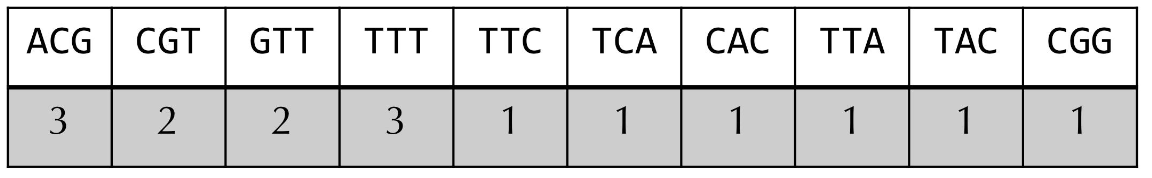
</div>
</br>
**Figure:** A table corresponding to counting the number of occurrences of every 3-mers in Text = 'ACGTTTCACGTTTTACGG'



The frequency table is a generalized version of an array called a **map** or **dictionary** for which the indices are allowed to be arbitrary values (in this case, they are strings). More precisely, the indices of a map are called **keys**.

Given a map *dict*, we can access the value associated with a key *key* using the notation *dict[key]*. In the case of a frequency table called *freq*, we can access the value associated with some key string pattern using the notation *freq[pattern]*. The following pseudocode function takes a string *text* and an integer *k* as input and returns their frequency table as a map of string keys to integer values.
</br></br>
<div>
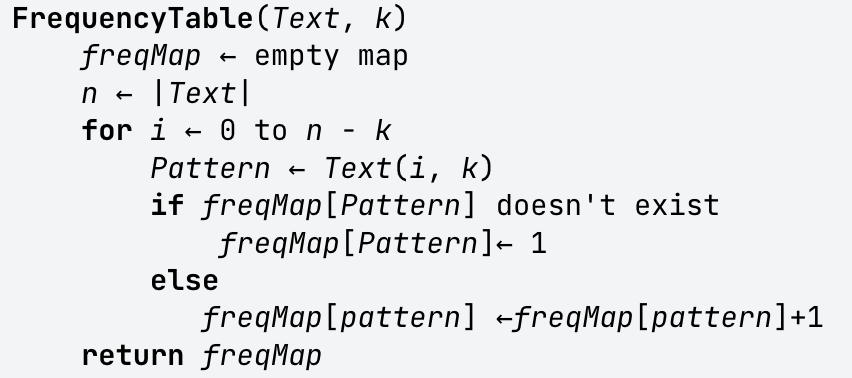
</div>

**BetterFrequentWords**
: This fuction relies on a function **MaxMap** that takes a map of strings to integers as an input and returns the maximum value of this map as output.
</br></br>

<div>
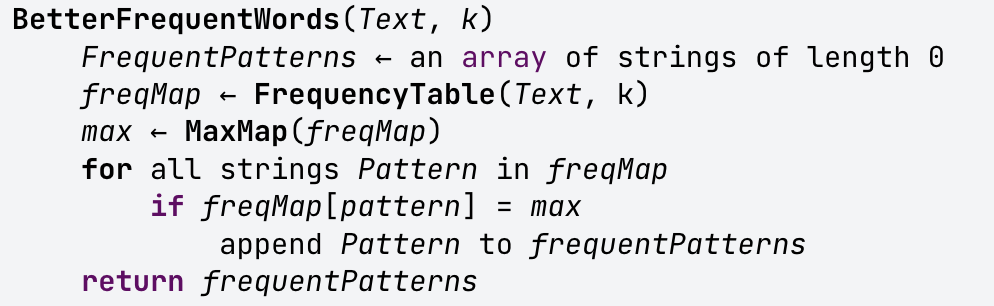
</div>

### Code Challenge
    
    : Solve the frequent Words Problem.
    
**Input:** A string Text and an integer k 
   
**Output:** All most frequent k-ers in Text


In [12]:
#Text = 'AAAGTCACGGAAAGTCACGGTAGCTTGGGCAGACAATGAAAGTCACGGACCCGTAGAGACAATGACGCCGCGCGACCCGTAGACCCGTAGAAAGTCACGGTAGCTTGGGCACGCCGCGCGAAAGTCACGGAGACAATGAGACAATGAAAGTCACGGAGACAATGACCCGTAGAGACAATGACGCCGCGCGAAAGTCACGGACCCGTAGAAAGTCACGGAAAGTCACGGAAAGTCACGGACGCCGCGCGAGACAATGACCCGTAGAGACAATGACGCCGCGCGACGCCGCGCGAAAGTCACGGACCCGTAGACCCGTAGACGCCGCGCGAGACAATGAAAGTCACGGAAAGTCACGGAAAGTCACGGACGCCGCGCGAAAGTCACGGAGACAATGAGACAATGTAGCTTGGGCAAAGTCACGGACGCCGCGCGACGCCGCGCGAGACAATGACCCGTAGTAGCTTGGGCAAAGTCACGGAAAGTCACGGACGCCGCGCGAAAGTCACGGACCCGTAGTAGCTTGGGCAAAGTCACGGACGCCGCGCGACCCGTAGACCCGTAGTAGCTTGGGCACGCCGCGCGAGACAATGAGACAATGACGCCGCGCGACGCCGCGCGAGACAATGTAGCTTGGGCACGCCGCGCGTAGCTTGGGCAAAGTCACGGAAAGTCACGGAGACAATGAAAGTCACGGAAAGTCACGGACCCGTAGACGCCGCGCGAAAGTCACGGTAGCTTGGGCTAGCTTGGGCACCCGTAGACCCGTAGAAAGTCACGGACCCGTAGAAAGTCACGGACCCGTAGTAGCTTGGGCACCCGTAGACGCCGCGCGAAAGTCACGGACGCCGCGCGACGCCGCGCGAAAGTCACGGACCCGTAGTAGCTTGGGCAAAGTCACGG'
#k = 12

Text = 'CGGAGGACTCTAGGTAACGCTTATCAGGTCCATAGGACATTCA'
k = 3

#input Text and k, returns the dictionary whose keys are the patterns and values their frequencies
def FrequencyTable(Text, k):
    freqMap = {}
    n = len(Text)
    
    for i in range(n - k + 1):
        pattern = Text[i : k + i]
        
        if pattern in freqMap:
            freqMap[pattern] += 1
        else:
            freqMap[pattern] = 1
    
    return freqMap


# input dictionary, returns the list of values from largest to smallest
def MaxMap(dic):
    vl = list(dic.values())
    vl.sort(reverse=True)
    # print(vl)
    
    return vl
    
    
# input Text and k, returns the list of patterns with most frequencies    
def BetterFrequentWords(Text, k):
    FrequentPatterns = []
    freqMap = FrequencyTable(Text,k)
    # print(freqMap)
    
    max = MaxMap(freqMap)[0]
    
    for pattern in freqMap:
        if freqMap[pattern] == max:
            FrequentPatterns.append(pattern)
            
    return FrequentPatterns


BetterFrequentWords(Text, k)

['AGG']

<div>
    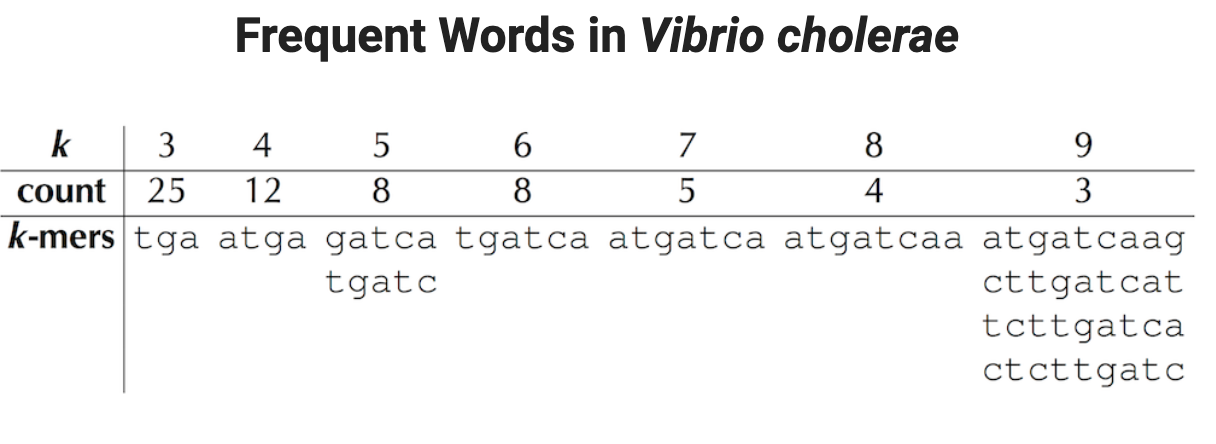
</div>

The 9-mer **ATGATCAAG** appears three time in the *ori* region of *Vibrio cholerae* !!

We highlight a most frequent 9-mer instead of using some other value of k because experiments have revealed that bacterial DnaA boxes are usually nine nucleotides long. The probability that there exists a 9-mer appearing three or more times in a randomly generated DNA string of length 500 is approximately 1/1300. 

In fact, there are four different 9-mers repeated three or more times in this region: ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC. The low likelihood of witnessing even one repeated 9-mer in the ori region of Vibrio cholerae leads us to the working hypothesis that one of these four 9-mers may represent a potential DnaA box that, when appearing multiple times in a short region, jump-starts replication

## 1.3 Some Hidden Messages are More Surprising than Others

Recall that nucleotides **A** and **T** are complements of each other, as are **G** and **C**. Having one strand and a supply of “free floating” nucleotides, one can imagine the synthesis of a **complementary** strand on a **template strand**. This model of replication was confirmed rigorously by Meselson and Stahl in 1958.

The figure below shows a template strand AGTCGCATAGT and its complementary strand ACTATGCGACT. The beginning and end of a DNA strand are denoted 5’ (pronounced “five prime”) and 3’ (pronounced “three prime”), respectively.


<dir>
    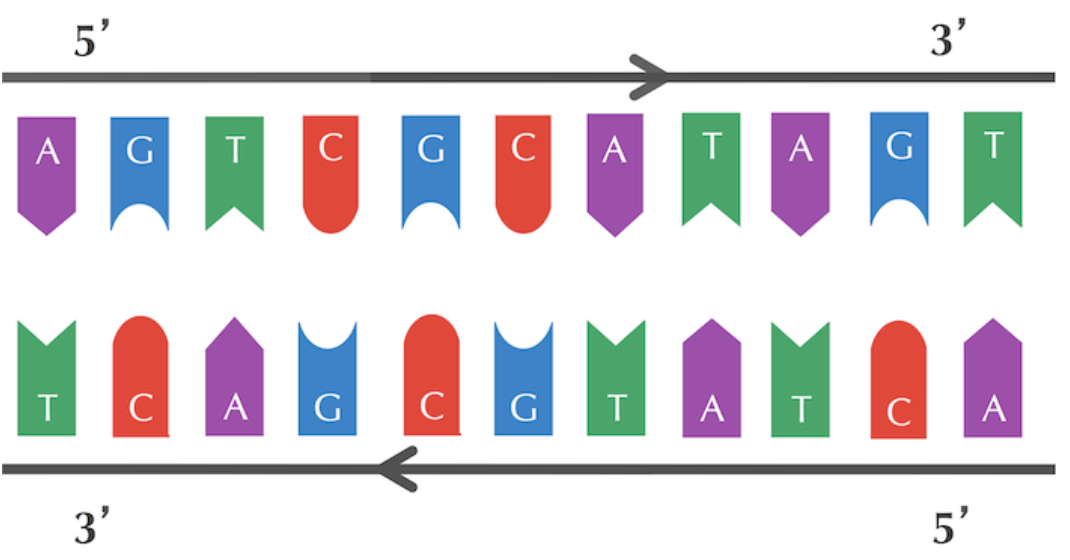
</dir>
</br>
**Figure:** Complementary strands run in opposite directions. Each strand is read in the 5' -> 3' direction

- template nucleotide _p_
    : string _Pattern_ = p1...pn
    
- complementary nucleotide = _p_*
    : **reverse complement** = pn*...p1*

**Reverse Complement Problem:** _Find the reverse complement of a DNA String
- **Input:** A DNA string _Pattern_
- **Output:** _Patternrc_, the reverse complement of _Pattern_

In [13]:
# Code challenge: Solve the Reverse Complement Problem

# pattern = input('Put template nucleotide:')
pattern = 'CCAGATC'

def ReverseComplement(ptrn):
    lpattern_rc = []
    
    for i in ptrn:
        if i == 'A':
            lpattern_rc.insert(0, 'T')
        elif i == 'T':
            lpattern_rc.insert(0, 'A')
        elif i == 'C':
            lpattern_rc.insert(0, 'G')
        else:
            lpattern_rc.insert(0, 'C')
    
    pattern_rc = "".join(lpattern_rc)
    
    return pattern_rc

ReverseComplement(pattern)

'GATCTGG'

**STOP and THINK** 
Look again at the four most frequent 9-mers in the ori of Vibrio cholerae (shown below): **ATGATCAAG, CTTGATCAT, TCTTGATCA, and CTCTTGATC**. Now do you notice anything surprising?

Interestingly, among the four most frequent 9-mers in _ori_ of _Vibrio cholerae_, **ATGATCAAG** and **CTTGATCAT** are reverse complements of each other, resulting in the six total occurrences of these strings shown below.


<dir>
    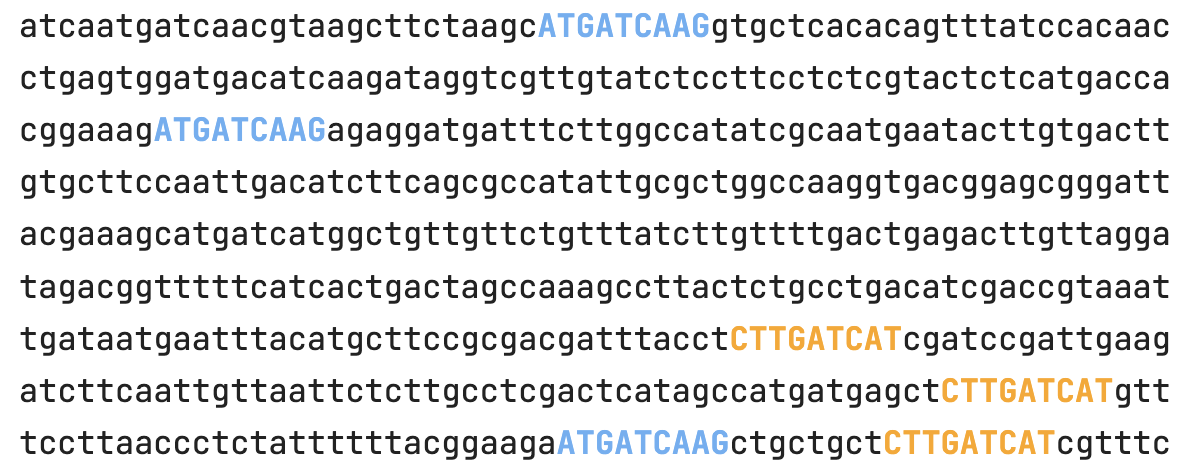
</dir>
</br>

This observation leads us to the working hypothesis that **ATGATCAAG** and its reverse complement **CTTGATCAT** indeed represent _DnaA_ boxees in _Vibrio cholerae_. 

(This computational conclusion makes sense biologically becase the _DnaA_ protein that binds to _DnaA_ boxes and initiates replication does ont care which of the two strands it binds to. Thus, for our purposes, both **ATCATCAAG** and **CTTGATCAT** represent _DnaA_ boxes.


!! But what if these strings occur repeatedly throughout the entire genome? Rather than just in the _ori_ region? !!

**Pattern Matching Problem:** Find all occurrences of a pattern in a string
- **Input:** Strings _Pattern_ and _Genome_
- **Output:** All starting positions in _Genome_ where _Pattern_ appears as a substring.

In [14]:
# Code Challenge: Solve the Pattern Matching Problem

# string = input('Put the String Pattern:')
# genome = input('Put the Genome:')

string = 'ATA'
genome = 'GACGATATACGACGATA'

def StartingPositions(strg, gnm):
    l_gnm = len(gnm)
    l_strg = len(strg)
    location = []
    
    for i in range(l_gnm - l_strg + 1):
        if gnm[i : i + l_strg] == strg:
            location.append(i)
            
    return location

positions = StartingPositions(string,genome)

positions_str = " ".join([str(pos) for pos in positions])
print(positions_str)

4 6 14


## 1.4 An Explosion of Hidden Messages

### Looking for hidden messages in multiple genomes

## The Clump Finding Problem

Instead of finding clumps of a specific _k_-mer, let's try to find _every_ _k_-mer that forms a clump in the genome !!

The location of these clumps will shed light on the location of _ori_.

= Looking for a region where a _k_-mer apeears several times in short successions in a window of fixed length _L_.

_k_-mers are defined as a "clump" if it appears many times within a short interval of the genome. More formally, given integers _L_, and _t_, a _k_-mer _Pattern_ forms an __(*L, t*)-clump__ inside a string _Genome_.

For example, **TGCA** forms a (25,3)-clump in the following _Genome_.


<dir>
    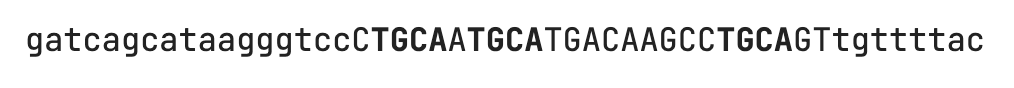
</dir>

**Clump Finding Problem:** Find patterns forming clumps in a string
</br>

   **Input:** A string _Genome_, and integers k, L, and t</br>
   **Output:** All distinct _k_-mers forming (*L, t*)-clups in _Genome_


<dir>
    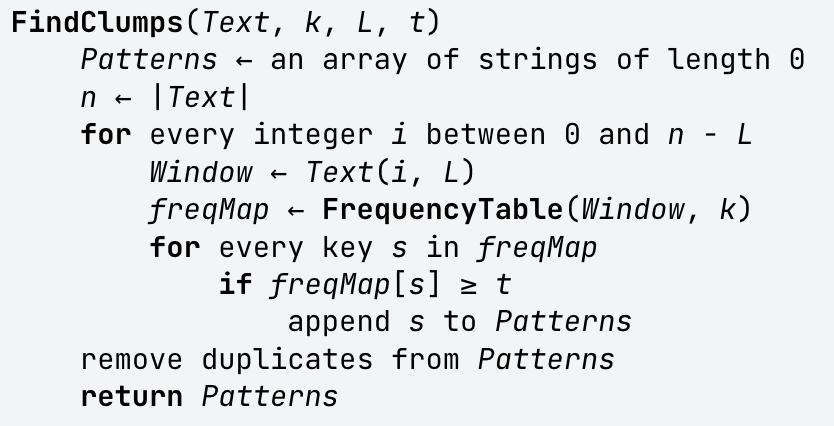
</dir>
   

In [15]:
# Code Challenge

def FindClumps(Text, k, L, t):
    Patterns = []
    n = len(Text)
    
    for i in range(n - L + 1):
        window = Text[i : L + i]
        freqMap = FrequencyTable(window, k)
        
        #print(i, L)
        #print(freqMap)
        
        for key in freqMap:
            if freqMap[key] >= t:
                Patterns.append(key)
                
                # print("\n", Patterns, "\n")
                
    Patterns = list(set(Patterns))
    
    return Patterns


Text = 'CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA'
k = 5
L = 50
t = 4

# Text = input('Put Text:')
# k = int(input('k: '))
# L = int(input('L: '))
# t = int(input('t: '))

listofclumps = FindClumps(Text, k, L, t)

findclumps = " ".join([str(clumps) for clumps in listofclumps])
print(findclumps)

CGACA GAAGA
